<a href="https://colab.research.google.com/github/shubhamL2477/AI-SEM3/blob/main/workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("diabetes_.csv")

df.head()

Saving diabetes_.csv to diabetes_ (3).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

 Handle Missing Data

In [17]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)


# Impute using mean
df.fillna(df.mean(), inplace=True)

Feature Engineering & Train-Test Split (From Scratch)

In [18]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values


# Train-test split (70-30)
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))


train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

Implement KNN from Scratch

Euclidean Distance

In [20]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

Predict Single Sample

In [22]:
def knn_predict_single(X_train, y_train, x_test, k):
  distances = []
  for i in range(len(X_train)):
    dist = euclidean_distance(X_train[i], x_test)
    distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    labels = [label for _, label in neighbors]
  return max(set(labels), key=labels.count)

Predict All Samples

In [24]:
def knn_predict(X_train, y_train, X_test, k):
  predictions = []
  for x in X_test:
    predictions.append(knn_predict_single(X_train, y_train, x, k))
  return np.array(predictions)

Accuracy

Experimentation with Scaling

In [25]:
def accuracy(y_true, y_pred):
  return np.mean(y_true == y_pred)

k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)
print("Accuracy:", accuracy(y_test, y_pred))

Accuracy: 0.658008658008658


Feature Scaling (Standardization)

In [26]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)


X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std
y_pred_scaled = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
print("Scaled Accuracy:", accuracy(y_test, y_pred_scaled))

Scaled Accuracy: 0.658008658008658


Experimentation with k

In [27]:
ks = range(1, 16)
acc_original, acc_scaled = [], []
time_original, time_scaled = [], []


for k in ks:
  start = time.time()
  pred = knn_predict(X_train, y_train, X_test, k)
  time_original.append(time.time() - start)
  acc_original.append(accuracy(y_test, pred))


start = time.time()
pred_s = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
time_scaled.append(time.time() - start)
acc_scaled.append(accuracy(y_test, pred_s))

Visualization

ValueError: x and y must have same first dimension, but have shapes (15,) and (1,)

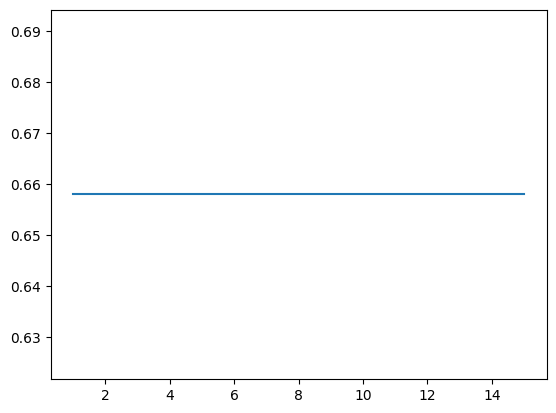

In [28]:
plt.figure()
plt.plot(ks, acc_original, label='Original')
plt.plot(ks, acc_scaled, label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(ks, time_original, label='Original')
plt.plot(ks, time_scaled, label='Scaled')
plt.xlabel('k')
plt.ylabel('Time Taken (s)')
plt.legend()
plt.show()